<a href="https://colab.research.google.com/github/kikiru328/Study_notebook/blob/main/Study_code/Deeplearning_framework/keras/keras03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 구조

    * 신경망의 훈련에는 다음 요소가 관련되어 있다.
    1. 네트워크 (또는 모델)을 구성하는 층
    2. 입력 데이터와 그에 상응하는 타깃
    3. 학습에 사용할 피드백 신호를 정의하는 손실 함수
    4. 학습 진행 방식을 결정하는 옵티마이저

### 층 : 딥러닝의 구성 단위

In [ ]:
# 층은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈.
# 대부분의 경우 가중치라는 층의 상태를 가지며, 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이다.
# 층마다 적절한 텐서 포맷ㅎ과 데이터 처리 방식이 다름.
# ex) (samples, features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터 == 완전 연결 층 / 빌집 연결 층 에 의해 처리됨.
#     (samples, timesteps, features) 크기의 3D 텐서로 저장된 시퀀스 데이터는 보통 LSTM과 같은 순환층
#     4D 텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D 합성곱 층에 의해 처리됨. (Conv2D)
# 케라스는 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구성함으로써 딥러닝 모델을 구축함.
# 층 호환성은 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환함.

from tensorflow.keras import layers
layer = layers.Dense( 32, input_shape=(784,) ) # 32개의 유닛으로 된 밀집 층을 의미.

# 첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층. ( 배치 차원인 0번째 축은 지정하지 않아 어떤 배치 크기도 입력 가능)
# 이 층은 첫 번째 차원 크기가 32로 변환된 텐서를 출력할 것.
# 따라서 이 층에는 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 함.

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add( layers.Dense( 32, input_shape = (784,) )
model.add( layers.Dense( 10 ) )

# 두 번째 층에는 input_shape 매개변수를 지정하지 않음 --> 앞선 층의 출력 크기를 입력 크기로 자동 채택

### 모델 : 층의 네트워크

In [ ]:
# 띱러닝 모델은 층으로 만든 비순환 유향 그래프. 
# 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓음.
# 네트워크 구조 == 가설 공간. ( 가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것. )
# 가설 공간을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 == 네트워크 구조

### 손실 함수와 옵티마이저 : 학습 과정을 조절하는 열쇠

In [ ]:
# 네트워크 구조를 정의하면 두 가지를 선택해야된다.
# 손실함수 ( 목적 함수 ) : 훈련하는 동안 최소화 될 값.
# 옵티마이저 : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정. 특정 종류의 확률적 경사 하강법을 구현.
# 문제에 맞는 목적 함수를 선택해야 됨.
# 2개의 클래스 분류 : 이진 크로스엔트로피 ( binary crossentropy )
# 다중 클래스 분류 : 범주형 크로스엔트로피 ( categorical crossentropy )
# 회귀 문제 : 평균 제곱 오차 ( Mean Squard Error )
# 시퀀스 학습 문제 : CTC ( connection Temporal Classification )

# 케라스란

    - 동일한 코드로 cpu 와 gpu 에서 사용이 가능
    - 사용하기 쉬운 api, 딥러닝 모델의 프로토타입을 빠르게 생성 가능
    - 컴퓨터 비전을 위한 합성곱 신경망, 시퀀스 처리를 위한 순환 신경망을 지원. --> 자유롭게 조합하여 사용 가능
    - 다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있음. ==> GAN 

### 케라스를 사용한 개발

In [ ]:
from typing import Sequence
# 모델을 정의하는 방법은 두가지.
# 1. Sequential 클래스 ( 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크 )
# 2. Functional API ( 완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프 )

# Sequential
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (784,)))
model.add(layers.Dense(10, activation='softmax'))

# API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs= input_tensor, outputs=output_tensor)
# API를 사용하면 모델이 처리할 데이터 텐서를 만들고 마치 함수처럼 이 텐서에 층을 적용함.


# 컴파일 단계에서 학습 과정이 설정된다.
# 여기에서 모델이 사용할 옵티마이저와 손실 함수, 훈련 하는 동안 필요한 측정 지표를 지정.
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate = 0.001),
              loss = 'mse',
              metrics=['accuracy'])

# 마지막으로 입력 데이터의 넘파이 배열을
# 모델의 fit() 메서드에 전달함으로써 학습 과정이 진행된다.
model.fit(input_tensor, target_tensor, batch_size=128, epoch=10)

# NLP ( 영화 리뷰 분류 : binary crossentropy )

### IMDB

    = Train 25000
    - test 25000
    - 50% 긍정 / 50% 부정

In [ ]:
# IMDB 데이터셋 로드
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words = 10000 )
# Train_labels / test_labels > negative : 0, positive : 1
print(train_data[0])
print(train_labels[0])
#num_words = 10000개로 index 0~9999
print(max( [max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index() # 단어와 정수 인덱스를 매핑
reverse_word_index = dict( [(value,key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑 ( flip )
decoded_review = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 리뷰를 디코딩. 0,1,2 는 '패딩', '문서시작', '사전에 없음' 을 위한 인덱스 따라서 0,1,2 총 3을 제거

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999
1654784/1641221 [==============================] - 0s

### Data 준비

In [ ]:
# 신경망에 숫자 리스트를 주입할 수 없음. 리스트를 텐서로 변환해야함.
# 같은 길이가 되도록 리스트에 패딩을 추가. samples, sequence_length 크기의 정수 텐서로 변환.
# 그 다음 이 정수 텐서를 다룰 수 있는 층읋 신경망의 첫 번째 층으로 사용함. (Embedding)
# 리스트를 one-hot encoding하여 0과 1의 벡터로 변환. 시퀀스 [3, 5]를 인덱스 3, 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환.
# 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용함.

# int sequence to binary matrix
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros( (len(sequences), dimension) ) # 크기가 (len(sequences), dimension), 모든 원소가 0 (np.zeros)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0])

# 레이블 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


### 신경망 모델 만들기

    - 입력 데이터가 벡터, 레이블이 이진 >> 가장 쉬움
    - 이런 문제에 잘 작동하는 네트워크 : acivation = 'relu' + 완전 연결층   # Relu : 음수를 0으로 만듬
        Dense(16, activation='relu')
    - Dense층의 16은 은닉 유닛. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨.
    - 16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻.
    - 입력 데이터와 W를 점곱하면 입력 데이턱라 16차원으로 표현된 공간으로 투영. ( 그리고 편향 벡터 b를 더하고 relu 연산을 적용 )
    - 은닉 유닛을 증가 ( 표현 공간을 더 고차원) > 신경망이 더욱 복잡한 표현을 할 수 있지만 무거워짐.

In [ ]:
# Dense 층을 쌓을때는 2가지 중요도 1. 얼마나 많은 층을 쌓을 것인지/ 얼마나 많은 은닉 유닛을 둘 것 인지?
# relu : 음수를 0으로 만듬. sigmoid :출력 값을 확률로 계산

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
# model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


### 훈련 검증

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000: ]

# 모델 훈련
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 38ms/step - loss: 0.4980 - acc: 0.7931 - val_loss: 0.4254 - val_acc: 0.8177
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2957 - acc: 0.9031 - val_loss: 0.2973 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2175 - acc: 0.9279 - val_loss: 0.2777 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1686 - acc: 0.9461 - val_loss: 0.2903 - val_acc: 0.8836
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1389 - acc: 0.9537 - val_loss: 0.2911 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1126 - acc: 0.9664 - val_loss: 0.3025 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0925 - acc: 0.9730 - val_loss: 0.4095 - val_acc: 0.8588
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0812 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


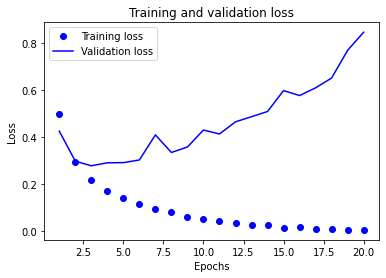

In [ ]:
# 훈련 검증 손실 그래프
history_dict = history.history
print(history_dict.keys())

from matplotlib import pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

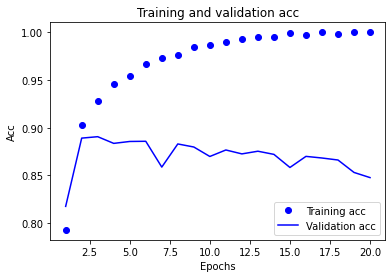

In [ ]:
plt.clf() #초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# 과대적합 발생

In [ ]:
# 재하습
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs = 4,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4689 - acc: 0.8265 - val_loss: 0.3067 - val_acc: 0.9066
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2703 - acc: 0.9060 - val_loss: 0.2086 - val_acc: 0.9340
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2085 - acc: 0.9264 - val_loss: 0.1719 - val_acc: 0.9437
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2898 - acc: 0.8858
[0.2898241877555847, 0.8857600092887878]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


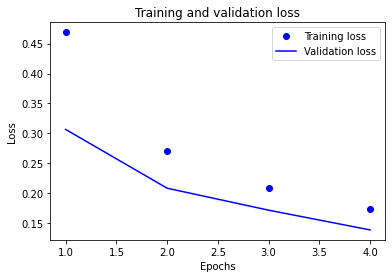

In [ ]:
# 훈련 검증 손실 그래프
history_dict = history.history
print(history_dict.keys())

from matplotlib import pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

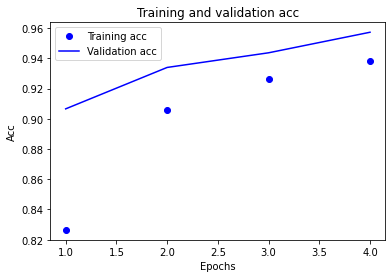

In [ ]:
plt.clf() #초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# 과대적합 발생

### 훈련된 모델로 새로운 데이터에 대해 예측

In [ ]:
model.predict(x_test)

array([[0.23048905],
       [0.99991596],
       [0.7433797 ],
       ...,
       [0.10103265],
       [0.06925239],
       [0.58078676]], dtype=float32)

# 정리

    - 원본 데이터를 신경망에 텥서로 주입하기 위해서는 꽤 많은 전처리가 필요함. 
    - 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식또한 존재함.
    - 출력 클래스가 2개인 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야됨.
    - 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라.
    - 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy.
    - rmsprop 옵티마이저는 범용적인 옵티마이저.
    - 훈련 데이터에 대해 성능이 향삼됨에 따라 신경망은 과대적합이 되기 쉬움. < 훈련 세트 이외의 데이터에서 성능을 모니터링 해야됨 >

# 뉴스 기사 분류 : 다중 분류 문제


### 로이터 데이터셋

    - 46개의 토픽이 있음. 각 토픽은 훈련 세트에 최소 10개의 샘플을 보유

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(len(train_data))
print(len(test_data))

2121728/2110848 [==============================] - 0s 0us/step
8982
2246


In [ ]:
# 텍스트 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(train_labels[10])

565248/550378 [==============================] - 0s 0us/step
3


### data 준비

In [ ]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros( (len(sequences), dimension) ) # 크기가 (len(sequences), dimension), 모든 원소가 0 (np.zeros)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0])

# 레이블 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


[0. 1. 1. ... 0. 0. 0.]


* 원-핫 인코딩


```
def to_one_hot(labels, dimension=46):
    results = np.zeros( (len(labels), dimension) )
    for i, label in enumerate(labels):
        results[i, label] = 1.
    retrun results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)    
```
        - 케라스에는 to_categorical 내장 함수가 있음


In [ ]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 구성

In [ ]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import activations

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 훈련 검증

Epoch 1/20
16/16 [==============================] - 4s 30ms/step - loss: 2.5334 - accuracy: 0.5263 - val_loss: 1.6808 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.3756 - accuracy: 0.7147 - val_loss: 1.2837 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0224 - accuracy: 0.7869 - val_loss: 1.1138 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.7975 - accuracy: 0.8344 - val_loss: 1.0134 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6334 - accuracy: 0.8676 - val_loss: 0.9529 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5049 - accuracy: 0.8923 - val_loss: 0.9129 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4064 - accuracy: 0.9159 - val_loss: 0.8709 - val_accuracy: 0.8190
Epoch 8/20
16

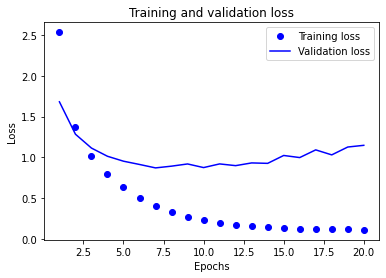

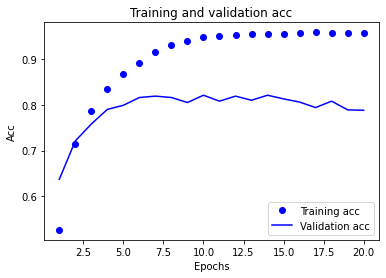

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000: ]

# 모델 훈련
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

# 훈련 검증 손실 그래프
history_dict = history.history
print(history_dict.keys())

from matplotlib import pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() #초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# 과대적합 발생

In [ ]:
# 재하습
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 26ms/step - loss: 2.8197 - accuracy: 0.4800 - val_loss: 1.8701 - val_accuracy: 0.6280
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.4938 - accuracy: 0.6992 - val_loss: 1.3330 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0903 - accuracy: 0.7719 - val_loss: 1.1558 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8642 - accuracy: 0.8153 - val_loss: 1.0482 - val_accuracy: 0.7730
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6880 - accuracy: 0.8540 - val_loss: 0.9788 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5520 - accuracy: 0.8831 - val_loss: 0.9469 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4431 - accuracy: 0.9068 - val_loss: 0.9385 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

### 새로운 데이터에 대해 예측하기

In [ ]:
prediction = model.predict(x_test)
print(prediction[0].shape) # predictions의 각 항목은 길이가 46인 벡터
print(np.sum(prediction[0])) # 벡터의 원소 합 == 1
print(np.argmax(prediction[0])) # 가장 큰 값이 예측 클래스


(46,)
1.0000001
3


### 레이블과 손실을 다루는 다른 방법

    레이블을 인코딩 하는 다른 방법 > 정수 텐서로 변환

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 이 방식을 사용하려면 손실 함수 하나만 변환. >> sparse_categorical_crossentropy
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics=['acc']) # 수학적으로는 categorical_crossentropy 와 동일하다.

# 충분히 큰 중간층을 두어야 하는 이유

    병목 현상을 방지해야된다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size =128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 2.9627 - acc: 0.2214 - val_loss: 2.2871 - val_acc: 0.2860
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8386 - acc: 0.5348 - val_loss: 1.5985 - val_acc: 0.6410
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3546 - acc: 0.6557 - val_loss: 1.4362 - val_acc: 0.6540
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1695 - acc: 0.6842 - val_loss: 1.3755 - val_acc: 0.6610
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0460 - acc: 0.7214 - val_loss: 1.3364 - val_acc: 0.6980
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9454 - acc: 0.7626 - val_loss: 1.3517 - val_acc: 0.7030
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8612 - acc: 0.7835 - val_loss: 1.3214 - val_acc: 0.7100
Epoch 8/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7915 - acc: 0.79

### 정리

    N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense층의 크기는 N 이여만 한다.
    단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax활성화 함수를 사용해야 된다.
    이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 한다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화 함
    다중 분류에서 레이블을 다루는 두 가지 방법
        - 레이블을 범주형 인코딩 ( one-hot ) > categorical_crossentropy
        - 레이블을 정수형 인코딩 > sparce_categorical_crossentropy
    많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 함.

# 주택 가격 예측 : 회귀 문제

### 보스턴 주택 가격 데이터셋

    - 데이터 포인트 506개.
    - 404 train, 102 test
    - scale difference


In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

# 13개의 수치 특성이 있음. 1인당 범죄율, 주택당 평균 방의 가수, 고속도로 접근성 등을 의미함.
train_targets

65536/57026 [==================================] - 0s 0us/step
(404, 13)
(102, 13)


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### data 준비

    - 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됨.
    - 이런 데이터를 다룰 때는 정규화를 하는 것이 좋다.
    - 입력 데이터에 있는 각 특성에 대해서 특성의 평균을 빼고 표준 편차로 나눈다.
    - 특성의 중앙이 0 근처에 맞추어지고 표준 편차가 1이 됨. (넘파이로 하면 편함)

In [2]:
# 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### 모델 구성

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mae'])
    return model
    

### K-fold cross-validaion

In [7]:
import numpy as np
num_val_samples = len(train_data) // k
num_epochs = 100
all_scroes = []
for i in range(k):
    print('fold # ', i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
         axis = 0
    )
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

fold #  0
fold #  1
fold #  2
fold #  3


In [10]:
 print(all_scores)
 print(np.mean(all_scores))
 # 평균값이 각각의 점수보다 훨씬 신뢰할 만하다.

[2.5165045261383057, 2.6947102546691895, 2.8203272819519043, 2.8480582237243652]
2.719900071620941


In [ ]:
# 각 폴드에서 검증 점수를 log 에 저장하기.
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('fold # ', i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
         axis = 0
    )
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

# 다음 모든 폴드에 대해 에포크의 mae 점수 평균을 계산.
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

# 검증 점수 그래프
from matplotlib import pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel['Validation MAE']
plt.show()


    * 그래프는 범위가 크고 변동이 심해 보기가 어려움
        1. 곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외
        2. 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체

In [ ]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smoooth_mae_history = smooth_curve(average_mae_history[:10])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# 검증 MAE 가 80 번째 에포크 이후에 줄어드는 것이 멈춤. 이 지점 이후로는 과대적합.
# 모델의 여러 매개변수에 대한 튜닝이 끝나면 에포크 수 뿐 아니라 은닉 층의 크기도 조절. 
# 모든 훈련 데이터를 사용하고 최상의 매개변수로 최종 실전에 투입될 모델을 훈련.

In [ ]:
# 최종 모델 훈련
model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose =0)
test_mse_score, test_mae_score = model.evluate(test_data, test_targets)

# 최종 결과
test_mae_score

### 정리
    1. 회귀는 분류에서 사용한 것과는 다른 손실함수를 사용함. ( 평균 제곱 오자 MSE 는 회귀에서 자주 사용 )
    2. 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다름
    3. 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야함.
    4. 가용한 데이터가 적다면 k-fold 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법.
    5. 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋음.

# 요약
    1. 벡터 데이터를 사용하여 가장 일반적인 이진분류, 다중분류, 스칼라 회귀 작업을 다룸.
    2. 원본 데이터를 신경망에 주입하기 전에 전처리
    3. 데이터에 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정
    4. 훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 새로운 데이터에 대해 나쁜 결과를 얻음
    5. 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개 또는 2개의 은닉 층을 가진 신경망을 사용
    6. 데이터가 많은 범주로 나뉘어 있을 때 중간층이 너무 작으면 정보의 병목이 생김
    7. 회귀는 분류와 다른 손실 함수와 평가 지표를 사용
    8. 적은 데이터를 사용할 때는 k-fold 검증이 신뢰도를 높임